In [ ]:
import seaborn as sns
import os
import pandas as pd
import json
import numpy as np
import natsort 
import zipfile
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# from mtcnn import MTCNN
import cv2

#Load data

In [ ]:
def create_df_video_Path(video_path):
  paths = []
  Videos_name = []
  for dirname, _, filenames in os.walk(video_path):
      for filename in filenames:
          paths.append(os.path.join(dirname, filename))
          Videos_name.append(filename)
          
  paths = natsort.natsorted(paths,reverse=False)
  Videos_name = natsort.natsorted(Videos_name,reverse=False)
  
  df = pd.DataFrame(
      {'paths' : paths,
       'fname' : Videos_name
      })
  
  return df

In [ ]:
df_paths_real_face = create_df_video_Path("/content/data_face_with_mask/real")
df_paths_fake_face = create_df_video_Path("/content/data_face_with_mask/fake")

In [ ]:
df_paths_real_face

,paths,fname
0,/content/data_face_with_mask/real/0_3.jpg,0_3.jpg
1,/content/data_face_with_mask/real/0_8.jpg,0_8.jpg
2,/content/data_face_with_mask/real/0_11.jpg,0_11.jpg
3,/content/data_face_with_mask/real/0_13.jpg,0_13.jpg
4,/content/data_face_with_mask/real/0_18.jpg,0_18.jpg
...,...,...
1677,/content/data_face_with_mask/real/161_1774.jpg,161_1774.jpg
1678,/content/data_face_with_mask/real/161_1856.jpg,161_1856.jpg
1679,/content/data_face_with_mask/real/161_1866.jpg,161_1866.jpg
1680,/content/data_face_with_mask/real/291_1448.jpg,291_1448.jpg


In [ ]:
df_paths_real_face.loc[:,"label"] = 1
df_paths_real_face

,paths,fname,label
0,/content/data_face_with_mask/real/0_3.jpg,0_3.jpg,1
1,/content/data_face_with_mask/real/0_8.jpg,0_8.jpg,1
2,/content/data_face_with_mask/real/0_11.jpg,0_11.jpg,1
3,/content/data_face_with_mask/real/0_13.jpg,0_13.jpg,1
4,/content/data_face_with_mask/real/0_18.jpg,0_18.jpg,1
...,...,...,...
1677,/content/data_face_with_mask/real/161_1774.jpg,161_1774.jpg,1
1678,/content/data_face_with_mask/real/161_1856.jpg,161_1856.jpg,1
1679,/content/data_face_with_mask/real/161_1866.jpg,161_1866.jpg,1
1680,/content/data_face_with_mask/real/291_1448.jpg,291_1448.jpg,1


In [ ]:
df_paths_fake_face.loc[:,"label"] = 0
df_paths_fake_face

,paths,fname,label
0,/content/data_face_with_mask/fake/0_1.jpg,0_1.jpg,0
1,/content/data_face_with_mask/fake/0_5.jpg,0_5.jpg,0
2,/content/data_face_with_mask/fake/0_10.jpg,0_10.jpg,0
3,/content/data_face_with_mask/fake/0_12.jpg,0_12.jpg,0
4,/content/data_face_with_mask/fake/0_14.jpg,0_14.jpg,0
...,...,...,...
1660,/content/data_face_with_mask/fake/159_1868.jpg,159_1868.jpg,0
1661,/content/data_face_with_mask/fake/159_1871.jpg,159_1871.jpg,0
1662,/content/data_face_with_mask/fake/159_1872.jpg,159_1872.jpg,0
1663,/content/data_face_with_mask/fake/159_1873.jpg,159_1873.jpg,0


In [ ]:
df_data = pd.concat([df_paths_fake_face,df_paths_real_face], ignore_index=True)
df_data

,paths,fname,label
0,/content/data_face_with_mask/fake/0_1.jpg,0_1.jpg,0
1,/content/data_face_with_mask/fake/0_5.jpg,0_5.jpg,0
2,/content/data_face_with_mask/fake/0_10.jpg,0_10.jpg,0
3,/content/data_face_with_mask/fake/0_12.jpg,0_12.jpg,0
4,/content/data_face_with_mask/fake/0_14.jpg,0_14.jpg,0
...,...,...,...
3342,/content/data_face_with_mask/real/161_1774.jpg,161_1774.jpg,1
3343,/content/data_face_with_mask/real/161_1856.jpg,161_1856.jpg,1
3344,/content/data_face_with_mask/real/161_1866.jpg,161_1866.jpg,1
3345,/content/data_face_with_mask/real/291_1448.jpg,291_1448.jpg,1


In [ ]:
img_size = 224 ## ImageNet ==> 224 x 224
def extract_features(df):
  arr_features = []
  arr_label = []
  for i in range(len(df)): 
    img_array = cv2.imread(df.loc[i,"paths"])
    new_array = cv2.resize(img_array, (img_size, img_size))
    label = df.loc[i,"label"]
    arr_features.append(new_array)
    arr_label.append(label)
  return arr_features, arr_label

In [ ]:
arr_features, arr_label = extract_features(df_data)

In [ ]:
# convert the data into a NumPy array, then preprocess it by scaling
# all pixel intensities to the range [0, 1]
data_features = np.array(arr_features, dtype="float") / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode the labels (which are currently strings) as integers and then
# one-hot encode them
le = LabelEncoder()
labels = le.fit_transform(arr_label)
labels = np_utils.to_categorical(labels, 2)

In [ ]:
len(labels)

3347

In [ ]:
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, Y_train, Y_test) = train_test_split(data_features, labels,
	test_size=0.3, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

#Model Training

In [ ]:
import tensorflow
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Large
from keras.models import model_from_json
import json

##MobileNetV2

In [ ]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train, Y_train, validation_data=(x_test,Y_test), batch_size=25, epochs = 450) ## Training

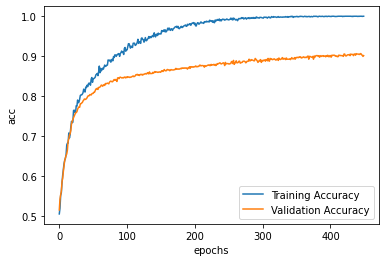

In [ ]:
epochs = list(range(450))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

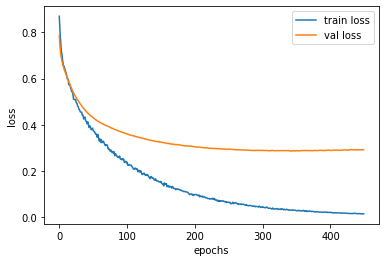

In [ ]:
epochs = list(range(450))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()

with open("Model_without_mask_01.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/Competition/Zalo_AI_Challenge_2022/Model/Model_with_mask_01.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Competition/Zalo_AI_Challenge_2022/Model/Model_weights_with_mask_01.h5')

In [ ]:
!cp 'Model_without_mask_01.json' '/content/drive/MyDrive/Colab Notebooks/Competition/Zalo_AI_Challenge_2022/Model/'

##NASNet

In [ ]:
from keras.applications.nasnet import NASNetLarge, NASNetMobile
NASNetLarge = NASNetLarge(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

343610240/343610240 [==============================] - 2s 0us/step


In [ ]:
NASNetLarge.trainable = False

In [ ]:
output = Flatten()(NASNetLarge.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(2,activation='sigmoid')(output)

In [ ]:
model_NASNetLarge = Model(inputs = NASNetLarge.input,outputs = prediction)
model_NASNetLarge.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 96  2592        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model_NASNetLarge.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [ ]:
history_NASNetLarge = model_NASNetLarge.fit(x_train, Y_train, validation_data=(x_test,Y_test), batch_size=25, epochs = 300) ## Training

Epoch 1/300
94/94 [==============================] - 72s 494ms/step - loss: 0.7680 - accuracy: 0.5188 - val_loss: 0.7097 - val_accuracy: 0.5134
Epoch 2/300
94/94 [==============================] - 39s 421ms/step - loss: 0.7123 - accuracy: 0.5184 - val_loss: 0.6985 - val_accuracy: 0.5303
Epoch 3/300
94/94 [==============================] - 40s 428ms/step - loss: 0.6981 - accuracy: 0.5213 - val_loss: 0.6952 - val_accuracy: 0.5284
Epoch 4/300
94/94 [==============================] - 41s 436ms/step - loss: 0.6916 - accuracy: 0.5320 - val_loss: 0.6927 - val_accuracy: 0.5493
Epoch 5/300
94/94 [==============================] - 42s 444ms/step - loss: 0.6915 - accuracy: 0.5393 - val_loss: 0.6906 - val_accuracy: 0.5662
Epoch 6/300
94/94 [==============================] - 43s 458ms/step - loss: 0.6820 - accuracy: 0.5726 - val_loss: 0.6861 - val_accuracy: 0.6060
Epoch 7/300
94/94 [==============================] - 42s 447ms/step - loss: 0.6778 - accuracy: 0.6046 - val_loss: 0.6814 - val_accuracy:

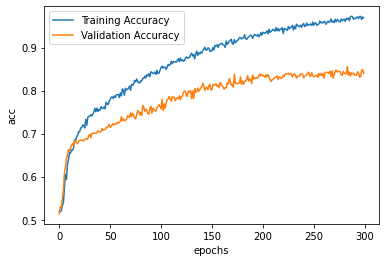

In [ ]:
epochs = list(range(300))
acc = history_NASNetLarge.history['accuracy']
val_acc = history_NASNetLarge.history['val_accuracy']
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

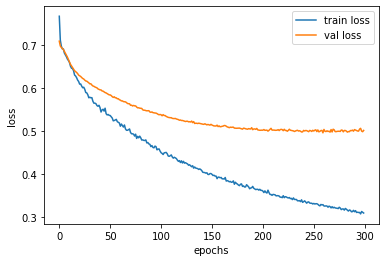

In [ ]:
epochs = list(range(300))
loss = history_NASNetLarge.history['loss']
val_loss = history_NASNetLarge.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# serialize model to JSON
model_json = model_NASNetLarge.to_json()
with open("new_antispoofing_model_NASNetLarge_01.json", "w") as json_file:
    json_file.write(model_json)
    

In [ ]:
model_NASNetLarge.save('/content/drive/MyDrive/Colab Notebooks/Competition/Zalo_AI_Challenge_2022/Model/Model_with_mask_01.h5')
model_NASNetLarge.save_weights('/content/drive/MyDrive/Colab Notebooks/Competition/Zalo_AI_Challenge_2022/Model/Model_with_mask_01.h5')